In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (15, 5)

In [4]:
complaints = pd.read_csv('311_small.csv')

/var/folders/b3/cjvms6c10k77tgv6k_rw3jbh0000gn/T/ipykernel_51022/3601407749.py:1: DtypeWarning: Columns (8,31,32,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  complaints = pd.read_csv('311_small.csv')


In [6]:
complaints.iloc[:, [8,31,32,34,35,36,37]].columns

Index(['Incident Zip', 'Vehicle Type', 'Taxi Company Borough',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment'],
      dtype='object')

In [7]:
complaints['Incident Zip'].dtype

dtype('O')

In [8]:
complaints['Complaint Type'].unique()

array(['HEAT/HOT WATER', 'HPD Literature Request', 'Smoking',
       'Sidewalk Condition', 'Damaged Tree', 'Street Condition',
       'Street Light Condition', 'General Construction/Plumbing',
       'Plumbing', 'Curb Condition', 'Animal Abuse',
       'Non-Residential Heat', 'Electronics Waste',
       'Traffic Signal Condition', 'Water System', 'APPLIANCE',
       'DOOR/WINDOW', 'Food Poisoning', 'Street Sign - Damaged',
       'Noise - Vehicle', 'Street Sign - Missing', 'Food Establishment',
       'Electrical', 'ELECTRIC', 'New Tree Request', 'Noise',
       'FLOORING/STAIRS', 'GENERAL', 'Root/Sewer/Sidewalk Condition',
       'Dead/Dying Tree', 'DOF Property - Reduction Issue',
       'DOF Property - Payment Issue', 'Traffic', 'Graffiti',
       'DOF Parking - Request Copy', 'SAFETY',
       'DOF Parking - Payment Issue', 'Illegal Parking',
       'DOF Parking - Request Status', 'Broken Muni Meter',
       'Taxi Complaint', 'Noise - Residential', 'Blocked Driveway',
       'Snow',

In [9]:
complaints[['Complaint Type', 'Borough']][:10]

Complaint Type        Borough
0                 HEAT/HOT WATER       BROOKLYN
1         HPD Literature Request    Unspecified
2                        Smoking       BROOKLYN
3             Sidewalk Condition      MANHATTAN
4                   Damaged Tree  STATEN ISLAND
5               Street Condition          BRONX
6               Street Condition  STATEN ISLAND
7               Street Condition  STATEN ISLAND
8         Street Light Condition       BROOKLYN
9  General Construction/Plumbing         QUEENS

In [13]:
complaints_counts = complaints['Complaint Type'].value_counts()

In [14]:
type(complaints_counts)

pandas.core.series.Series

In [15]:
complaints_counts[:10]

Complaint Type
HEAT/HOT WATER                         124358
Noise - Residential                     83272
General Construction/Plumbing           57295
Illegal Parking                         56634
Request Large Bulky Item Collection     54515
Blocked Driveway                        51171
Street Condition                        47301
Water System                            28549
Street Light Condition                  26744
UNSANITARY CONDITION                    25171
Name: count, dtype: int64

<Axes: xlabel='Complaint Type'>

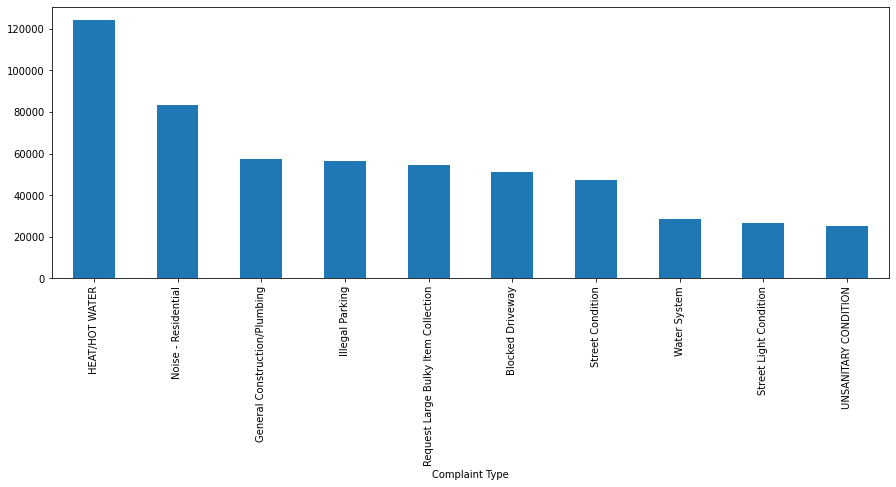

In [16]:
complaints_counts[:10].plot(kind='bar')

In [17]:
noise_complaints = complaints[complaints['Complaint Type'] == 'Noise - Residential']

In [19]:
noise_complaints.shape

(83272, 41)

In [21]:
is_noise = complaints['Complaint Type'] == 'Noise - Residential'

In [27]:
is_brooklyn = complaints['Borough'] == 'BROOKLYN'

In [29]:
complaints[is_noise & is_brooklyn].shape

(23083, 41)

In [26]:
complaints['Borough'].value_counts()

Borough
BROOKLYN         322885
QUEENS           240326
BRONX            182361
MANHATTAN        181866
STATEN ISLAND     53961
Unspecified       18502
Name: count, dtype: int64

In [30]:
complaints[is_noise & is_brooklyn][['Created Date', 'Incident Zip']]

Created Date Incident Zip
341     12/28/2017 06:52:56 PM        11205
660     02/23/2013 12:38:24 AM        11206
951     12/28/2017 09:56:02 PM        11207
956     12/28/2017 03:07:39 PM        11206
959     12/28/2017 09:23:11 PM        11207
...                        ...          ...
999710  05/14/2018 11:33:45 PM      11229.0
999743  05/14/2018 08:43:58 PM      11220.0
999750  05/14/2018 06:52:12 PM      11234.0
999753  05/15/2018 12:04:38 AM      11218.0
999850  05/15/2018 01:15:18 AM      11206.0

[23083 rows x 2 columns]

In [43]:
complaints_counts = complaints['Borough'].value_counts()

In [46]:
noise_complaints = complaints[is_noise]

In [47]:
noise_complaints_counts = noise_complaints['Borough'].value_counts()

In [49]:
complaints_counts

Borough
BROOKLYN         322885
QUEENS           240326
BRONX            182361
MANHATTAN        181866
STATEN ISLAND     53961
Unspecified       18502
Name: count, dtype: int64

In [50]:
noise_complaints_counts / complaints_counts

Borough
BRONX            0.125767
BROOKLYN         0.071490
MANHATTAN        0.113991
QUEENS           0.059415
STATEN ISLAND    0.040881
Unspecified      0.002054
Name: count, dtype: float64

<Axes: xlabel='Borough'>

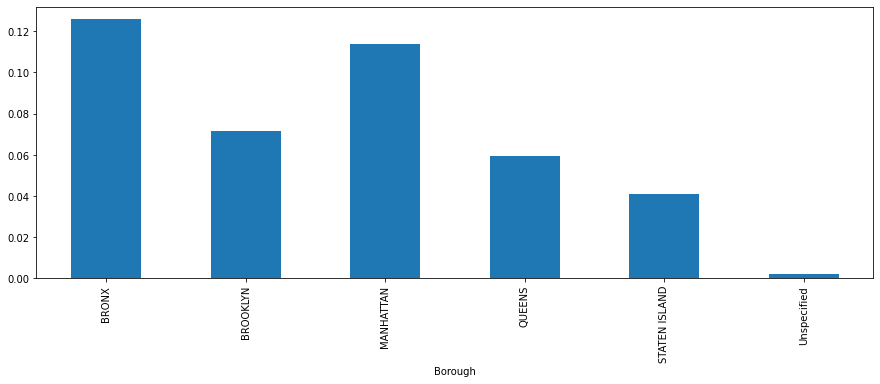

In [51]:
(noise_complaints_counts / complaints_counts).plot(kind='bar')

In [54]:
complaints['Incident Zip'].astype(int).value_counts()

ValueError: cannot convert float NaN to integer

In [55]:
zips = complaints['Incident Zip']

In [58]:
zips.isna().sum()

88509

In [60]:
zips.dropna().astype(int)

ValueError: invalid literal for int() with base 10: '37214-0065'

In [68]:
import numpy as np

def clean_zipcode(x):
    try:
        res = int(x)
    except ValueError:  # either float or nan
        if np.isnan(x):
            res = -1
        else:
            try:
                res = int(x.split('-')[0])
            except:
                res = 0
                
    return res

In [70]:
zips.apply(lambda x: clean_zipcode(x))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [71]:
np.isnan('123')

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''